In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import locale
locale.setlocale(locale.LC_ALL, '')

'English_United States.1252'

In [21]:
Covid_US_data = "time_series_covid19_confirmed_US.csv.txt"
Covid_US_df = pd.read_csv(Covid_US_data)

Covid_US_df.set_index("Province_State")
only_ny = Covid_US_df.loc[Covid_US_df["Province_State"] == "New York"]
only_ny


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
1833,84036001,US,USA,840,"36,001",Albany,New York,US,42.6006,-73.9772,...,240,253,267,293,305,319,333,342,379,426
1834,84036003,US,USA,840,"36,003",Allegany,New York,US,42.2575,-78.0275,...,10,12,14,16,16,17,17,21,22,26
1835,84036005,US,USA,840,"36,005",Bronx,New York,US,40.8521,-73.8628,...,0,0,0,0,0,0,0,0,0,0
1836,84036007,US,USA,840,"36,007",Broome,New York,US,42.159,-75.8133,...,42,46,56,65,71,76,86,93,105,112
1837,84036009,US,USA,840,"36,009",Cattaraugus,New York,US,42.2478,-78.6792,...,7,8,9,9,10,12,13,15,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,84036119,US,USA,840,"36,119",Westchester,New York,US,41.1628,-73.7574,...,10683,11567,12351,13081,13723,14294,14294,15887,17004,18077
1893,84036121,US,USA,840,"36,121",Wyoming,New York,US,42.7015,-78.222,...,10,14,15,18,22,23,23,27,29,30
1894,84036123,US,USA,840,"36,123",Yates,New York,US,42.6351,-77.1037,...,0,1,1,1,1,1,1,1,1,2
3181,84080036,US,USA,840,"80,036",Out of NY,New York,US,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Final = only_ny.groupby(["Admin2"])["4/10/20"].sum().reset_index()
NewYork_df = pd.DataFrame(Final)
NewYork_df = NewYork_df.rename(columns={'Admin2': 'Town/City','4/10/20': 'Confirmed # of Cases'})
NewYork_df = NewYork_df.sort_values("Confirmed # of Cases",ascending=[False]).head(5)
pd.options.display.float_format = '{:n}'.format
NewYork_df


,Town/City,Confirmed # of Cases
30,New York,92384
29,Nassau,21512
52,Suffolk,20320
61,Westchester,18077
44,Rockland,7122


([<matplotlib.patches.Wedge at 0x14249db0048>,
 [Text(-0.5201381173915628, -1.0814140459770072, 'New York'),
  Text(1.0721661356025243, 0.24588570041210153, 'Nassau'),
  Text(0.5474992432753167, 0.9540673868301733, 'Suffolk'),
  Text(-0.25689141043102953, 1.0695825369024854, 'Westchester'),
  Text(-0.7354491480811031, 0.8179942240546566, 'Rockland')],
 [Text(-0.303413901811745, -0.6308248601532542, '58.0%'),
  Text(0.5848178921468313, 0.13411947295205537, '13.5%'),
  Text(0.2986359508774455, 0.5204003928164581, '12.7%'),
  Text(-0.14012258750783427, 0.5834086564922647, '11.3%'),
  Text(-0.40115408077151077, 0.44617866766617625, '4.5%')])

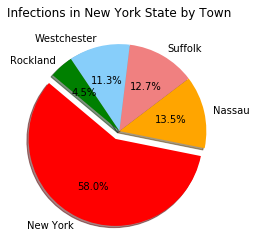

In [53]:
labels = NewYork_df["Town/City"] 
values = NewYork_df["Confirmed # of Cases"]
colors = ["red", "orange", "lightcoral", "lightskyblue","green"]
explode = (0.1, 0, 0, 0,0)
plt.title("Infections in New York State by Town")
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



